C:\MV\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(39717, 111)
Check empty Columns: 54
(39717, 57)
pymnt_plan n    39717
Name: pymnt_plan, dtype: int64
initial_list_status f    39717
Name: initial_list_status, dtype: int64
collections_12_mths_ex_med 0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
policy_code 1    39717
Name: policy_code, dtype: int64
application_type INDIVIDUAL    39717
Name: application_type, dtype: int64
acc_now_delinq 0    39717
Name: acc_now_delinq, dtype: int64
delinq_amnt 0    39717
Name: delinq_amnt, dtype: int64
pub_rec_bankruptcies 0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
tax_liens 0.0    39678
Name: tax_liens, dtype: int64
(39717, 49)
count of null values in column mths_since_last_record = 36931


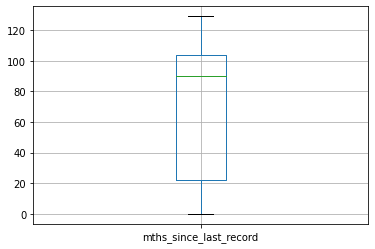

In [64]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# load loan data
data_loan = pd.read_csv("loan.csv")
data_loan.head()
print(data_loan.shape)
print('Check empty Columns:', data_loan.isnull().all(axis=0).sum())

# remove columns where there is no value 
data_loan.dropna(axis = 1, how = 'all', inplace = True)
print(data_loan.shape)

# columns with single value, we can ignore these for our analysis 
print('pymnt_plan', pd.value_counts(data_loan.pymnt_plan))
print('initial_list_status', pd.value_counts(data_loan.initial_list_status))
print('collections_12_mths_ex_med',pd.value_counts(data_loan.collections_12_mths_ex_med))
print('policy_code',pd.value_counts(data_loan.policy_code))
print('application_type', pd.value_counts(data_loan.application_type))
print('acc_now_delinq', pd.value_counts(data_loan.acc_now_delinq))
print('delinq_amnt', pd.value_counts(data_loan.delinq_amnt))
print('pub_rec_bankruptcies', pd.value_counts(data_loan.pub_rec_bankruptcies))
print('tax_liens', pd.value_counts(data_loan.tax_liens))


# remove column which don't have much value , most of them have single and irrelevant value
data_loan.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','delinq_amnt','inq_last_6mths'], axis = 1, inplace = True)
print(data_loan.shape)

# boxplot to check the dispersion of the data)
data_loan.boxplot(column = 'mths_since_last_record')
print('count of null values in column mths_since_last_record =' , data_loan['mths_since_last_record'].isna().sum())
# as we have most of the null in the column we can drop this
data_loan.drop(['mths_since_last_record' ], axis = 1, inplace = True)

count of null values in column mths_since_last_delinq = 25682


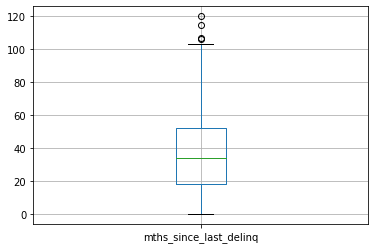

In [65]:
data_loan.boxplot(column = 'mths_since_last_delinq')
print('count of null values in column mths_since_last_delinq =' , data_loan['mths_since_last_delinq'].isna().sum())
# as we have most of the null in the column we can drop this
data_loan.drop(['mths_since_last_delinq' ], axis = 1, inplace = True)

In [66]:

# with the above approach we checked and found these below columns have very few values < 3 % 
# or some of the columns are related to post approval of loan which is not required for our analysis
# we can drop these columns

data_loan.describe()
data_loan.drop(['next_pymnt_d','total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_amnt','last_credit_pull_d'], axis = 1, inplace = True)
print(data_loan.shape)


# Our analysis will make sense on funded_amnt_inv instead of funded_amnt so we can drop funded_amnt
data_loan.drop(['funded_amnt'], axis = 1, inplace = True)
print(data_loan.shape)


# we can drop below columns as they will not add any value to the data
data_loan.drop(['member_id','url','title','zip_code','sub_grade','desc','emp_title'], axis = 1, inplace = True)
print(data_loan.shape)


(39717, 41)
(39717, 40)
(39717, 33)


In [67]:


data_loan.emp_length.fillna("NotAvailable",inplace=True)
data_loan.describe()

data_loan.chargeoff_within_12_mths.value_counts()
# we can drop below columns due to values in column has Zero or NA
data_loan.drop(['chargeoff_within_12_mths'], axis = 1, inplace = True)
print(data_loan.shape)

(39717, 32)


In [68]:
# to change  revol_util % to numeric values

print('count', data_loan.revol_util.value_counts())
data_loan_temp = data_loan[~data_loan.revol_util.isnull()]

count 0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64


In [69]:
data_loan_temp.revol_util = data_loan_temp.revol_util.apply(lambda x: float(x[:-1]))
data_loan_temp.revol_util.describe()


C:\MV\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [70]:
missing = (100* data_loan.isnull().sum()/data_loan.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
revol_util,0.125891
tax_liens,0.098195
loan_amnt,0.000000
total_rec_late_fee,0.000000
total_rec_int,0.000000
total_pymnt_inv,0.000000
total_pymnt,0.000000
out_prncp_inv,0.000000


In [71]:
temp= pd.Series(data_loan.isnull().mean() * 100)
temp.sort_values(ascending=False)
#type (#temp.sort_values(0,ascending=False)
#missing.sort_values(0,ascending=False)


pub_rec_bankruptcies    1.754916
last_pymnt_d            0.178765
revol_util              0.125891
tax_liens               0.098195
loan_amnt               0.000000
total_rec_late_fee      0.000000
total_rec_int           0.000000
total_pymnt_inv         0.000000
total_pymnt             0.000000
out_prncp_inv           0.000000
out_prncp               0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
id                      0.000000
dti                     0.000000
addr_state              0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
emp_length              0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
funded_amn

In [72]:
temp1 = data_loan.loc[:,["pub_rec_bankruptcies","loan_status"]]
temp1.head()

,pub_rec_bankruptcies,loan_status
0,0.0,Fully Paid
1,0.0,Charged Off
2,0.0,Fully Paid
3,0.0,Fully Paid
4,0.0,Current


In [73]:
# It is good to understand if there is any correlation between meassures and find out if they are highly related or not. For analysis we can on ignore one coulumn if they are Highlty related 

#total_pymnt & total_pymnt_inv  both are corealted so we can drop one columns
data_loan[['total_pymnt','total_pymnt_inv']].corr(method='pearson')

# out_prncp & out_prncp_inv both are corealted so we can drop one columns
data_loan[['out_prncp','out_prncp_inv']].corr(method='pearson')

# We can say that it is safe to drop below columns as per above analysis
data_loan = data_loan.drop(columns = ["total_pymnt_inv", "out_prncp_inv"])


In [74]:

data_loan.loan_status.value_counts()
#Our focus is on defaulter so we can ignore People who are currently paying so we can drop rows for those
data_loan = data_loan[data_loan.loan_status!="Current"]

In [75]:
#For better analysis let's convert loan_status categories to numerical values : we have assign 1 for defaulter and 0 for fully paid
data_loan.loan_status = data_loan.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)
data_loan['loan_status'].unique()

array([0, 1], dtype=int64)

In [76]:
## It is good approach to save the processed data in a file, couple of reasons like no need to re-run from start and for quick access for futher analysis
data_loan.to_csv("dataprocessed_loan.csv")
data_loan = pd.read_csv("dataprocessed_loan.csv",index_col=[0])

In [77]:
data_loan.shape
data_loan.loan_status.describe()

count    38577.000000
mean         0.145864
std          0.352975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


C:\MV\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

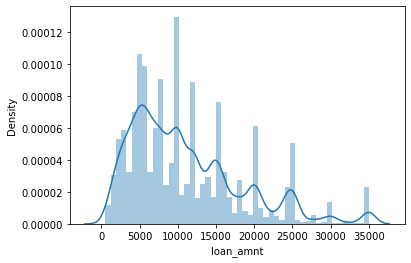

In [78]:
print(data_loan['loan_amnt'].describe())
#sns.boxplot(data=data_loan,x = "loan_amnt")
sns.distplot(data_loan.loan_amnt)
#median loan_amount is 10000
#Most of the loans are ranging in between 5000 to 15000


In [80]:
data_loan['loan_amnt_bucket'] = data_loan.loan_amnt.apply(lambda x: (x//5000)+1 if (x%5000) > 0 else (x//5000))

data_loan['loan_amnt_bucket'].unique()

array([1, 2, 3, 5, 7, 6, 4], dtype=int64)

In [81]:
def plt_loan_default_nondefault_pct_univariate(dataframe,variable1=None,variable2=None,figsize=(20,10),
                                           plottype="barplot",xlabel="Xlabel",xlabel_size=18,
                                           ylabel="Ylabel",ylabel_size=18,plot_title="Plot Title",
                                           plot_title_size=20,perc_fontsize=10,n_categories=2,show_count_label= False):
    
    ''' 
        dataframe        : data 
        variable1        : main category
        variable2        : sub/other category 
        plottype         : countplot -> if looking for countplot under each subcategory within a category
                         : barplot -> if looking for barplot 
        figsize          : tuple (x,y) with plot size
        xlabel           : xlabel of the plot
        xlabel_size      : fontsize of xlabel
        ylabel           : ylabel of the plot
        ylabel_size      : fontsize of ylabel
        plot_title       : Title of the graph
        plot_title_size  : fontsize of the plot_title
        perc_fontsize    : size of the percentage labels on each bar
        show_count_label : show counts with percentage 

    '''

    # Defining the plot size
    plt.figure(figsize=figsize)

    # Defining the values for x-axis, y-axis
    # and from which datafarme the values are to be picked
    if plottype == "countplot":
        plots = sns.countplot(data = dataframe, x = variable1,hue = variable2)
        # Iterrating over the bars one-by-one
        bar_lengths = []
        for bar in plots.patches:
            bar_lengths.append(bar.get_height())

        bars_0 = bar_lengths[0:n_categories]
        bars_1 = bar_lengths[n_categories:]
        # print(bars_0,bars_1)
        for i,bar in enumerate(plots.patches):
        #     print(bar.get_height())
            if i<n_categories:
                perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
            else:
                perc = 100*(bar.get_height()/(bars_0[i-n_categories]+bars_1[i-n_categories]))

            if show_count_label:   
                plots.annotate(str(format(bar.get_height(),'.0f'))+'  ('+str(format(perc, '.2f'))+"%)", 
                               (bar.get_x() + bar.get_width() / 2, 
                                bar.get_height()), ha='center', va='center',
                               size=perc_fontsize, xytext=(0, 8),
                               textcoords='offset points')
            else:
                plots.annotate(str(format(perc, '.2f'))+"%", 
                               (bar.get_x() + bar.get_width() / 2, 
                                bar.get_height()), ha='center', va='center',
                               size=perc_fontsize, xytext=(0, 8),

                               textcoords='offset points')
        plt.legend(['0','1'],loc="upper right",title="loan_status")

        
    elif plottype == "barplot":
        plots=sns.barplot(data=dataframe,x=variable1,y=variable2)
        # Iterrating over the bars one-by-one
        for bar in plots.patches:
            plots.annotate(str(format(bar.get_height(), '.2f'))+"%", 
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()), ha='center', va='center',
                           size=perc_fontsize, xytext=(0, 8),
                           textcoords='offset points')


        
    # Setting the label for x-axis
    plt.xlabel(xlabel, size=xlabel_size)

    # Setting the label for y-axis
    plt.ylabel(ylabel, size=ylabel_size)

    # Setting the title for the graph
    plt.title(plot_title , size = plot_title_size)
    # Fianlly showing the plot
    plt.show()
    
    

In [82]:
## Let us define a function which will return defaulting percentages for given category variable1
def defaulting_pct_univariate(variable1):
    x = pd.DataFrame(data_loan.groupby(by=[variable1])["loan_status"].count()) ## get counts of borrowers in each category in variable 2 under a each category in variable 1
    y = pd.DataFrame(data_loan.groupby(by=[variable1])["loan_status"].sum())   ## get no of defaulters
    x = x.rename(columns = {"loan_status" : 'count1'})
    y = y.rename(columns = {"loan_status" : 'sum1'})
    z = pd.merge(x,y,left_index=True, right_index=True, how = "inner") ## merge these dataframes
    z["def_perc"] = 100 * z['sum1']/z.count1 ## get the percentages of defaulting
    z["ndef_perc"] = 100 - z.def_perc ## get the percentages of non_ defaulting
    z.reset_index(inplace=True)
    z = z.sort_values(by='def_perc')
    return z



## Let us define a function which will return a minimum and maximum differencef with defaulting percentages for given category variable1
def defaulting_rng_univariate(variable1):
    x = pd.DataFrame(data_loan.groupby(by=[variable1])["loan_status"].count()) ## get counts of borrowers in each category in variable 2 under a each category in variable 1
    y = pd.DataFrame(data_loan.groupby(by=[variable1])["loan_status"].sum())   ## get no of defaulters
    x = x.rename(columns = {"loan_status" : 'count1'})
    y = y.rename(columns = {"loan_status" : 'sum1'})
    z = pd.merge(x,y,left_index=True, right_index=True, how = "inner") ## merge these dataframes
    z["def_perc"] = 100 * z['sum1']/z.count1 ## get the percentages of defaulting
    z["ndef_perc"] = 100 - z.def_perc ## get the percentages of non_ defaulting
    z.reset_index(inplace=True)
    z = z.sort_values(by='def_perc')
    diff=z.def_perc.iloc[-1]-z.def_perc.iloc[0]
    return diff

## defining a map of all the key factors with their range of defaulting variation
default_map = {}

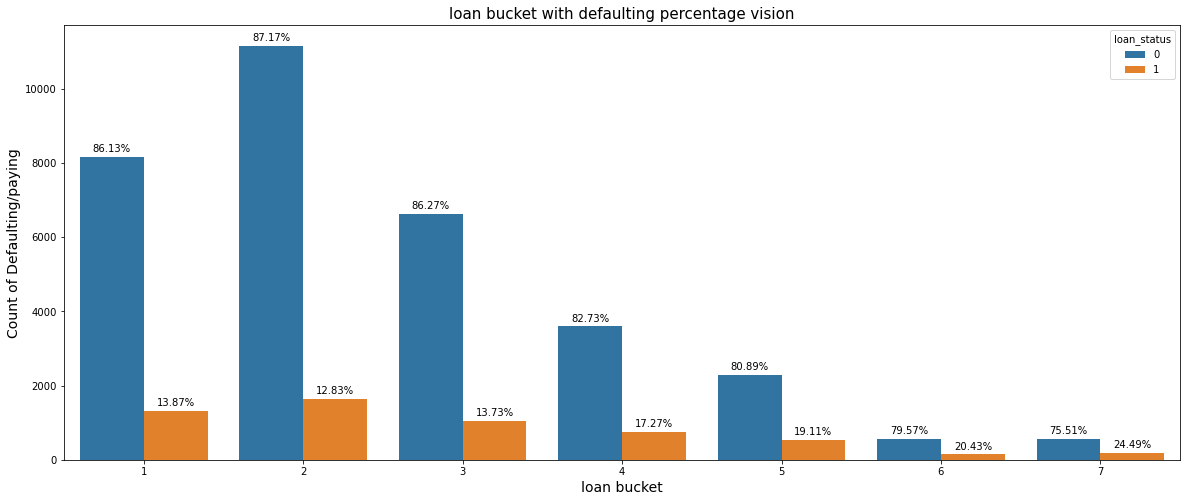

Difference between min and max defaulting percentages = 11.66


In [83]:


plt_loan_default_nondefault_pct_univariate(data_loan,"loan_amnt_bucket","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="loan bucket",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="loan bucket with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=10,n_categories=7,show_count_label=False)
default_map["loan_amnt_bucket"] = round(defaulting_rng_univariate("loan_amnt_bucket"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_rng_univariate("loan_amnt_bucket"),2))

In [ ]:
#With this we can see some pattern that above 15,000 (bucket 4) defualting rate is increasing.
# Which means that when who have taken higher loan amounts are likely to be contributing towards defaulting rate



C:\MV\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\MV\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MANISH~1.VIR\AppData\Local\Temp/ipykernel_21564/1685145134.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


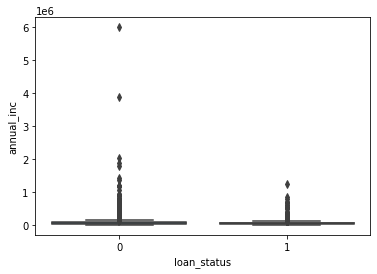

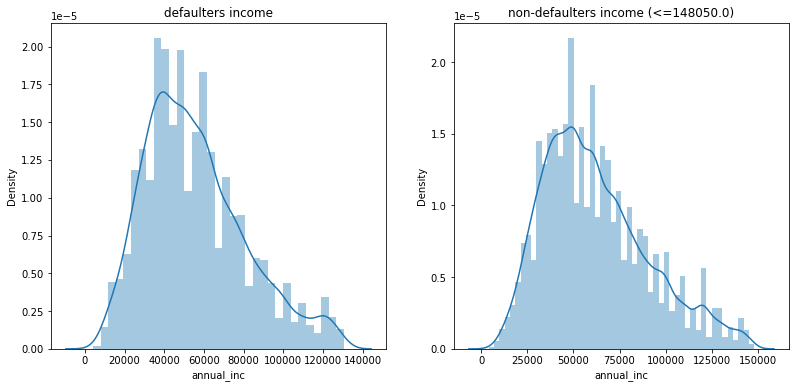

In [84]:
##checking outliers
sns.boxplot(data = data_loan, x = "loan_status", y="annual_inc")
#plot the income within the upper whisker ignoring outliers for both the categories
def_inc = data_loan[data_loan.loan_status == 1]
ndef_inc = data_loan[data_loan.loan_status == 0]
q1=ndef_inc.annual_inc.quantile(.25)
q3=ndef_inc.annual_inc.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
q1=def_inc.annual_inc.quantile(.25)
q3=def_inc.annual_inc.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)


fig, ax =plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(right = 0.98)
ax[0].title.set_text("defaulters income")
ax[1].title.set_text("non-defaulters income (<=148050.0)")
sns.distplot(def_inc[def_inc.annual_inc<=131340.0].annual_inc,ax=ax[0])
sns.distplot(ndef_inc[ndef_inc.annual_inc<=148050].annual_inc,ax=ax[1])
fig.show()

In [85]:
#code for dividing annual_inc into 7 buckets
def income_buckets(x):
    if x> 150000:
        return 7
    else:
        if (x%25000) > 0:
            return (x//25000)+1
        else:
            return x//25000
data_loan['income_bucket'] = data_loan.annual_inc.apply(lambda x:  income_buckets(x))
#checking value counts of buckets
data_loan.income_bucket.value_counts().to_frame()


,income_bucket
2.0,12839
3.0,11668
4.0,6039
5.0,2695
1.0,2550
7.0,1486
6.0,1300


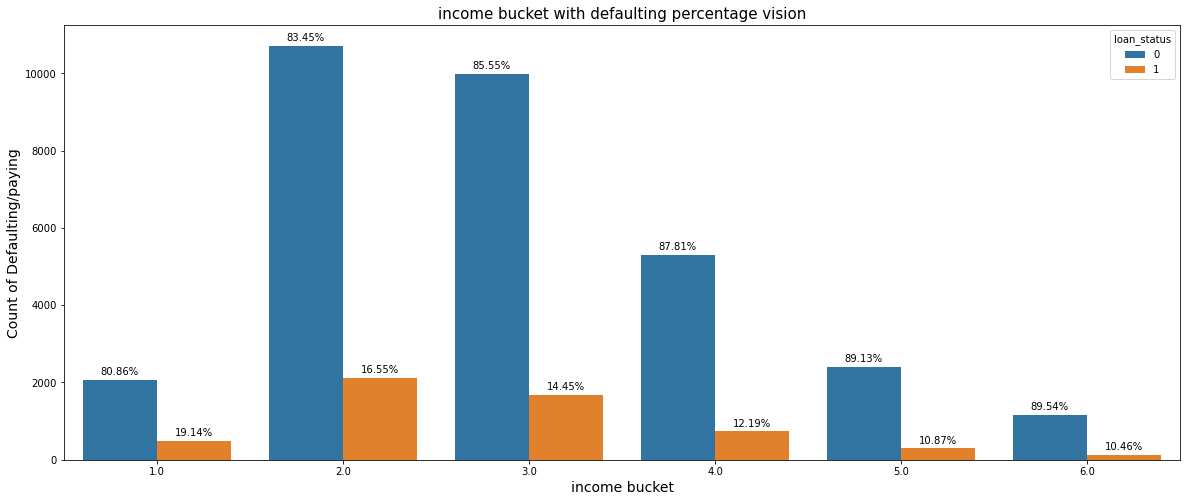

Difference between min and max defaulting percentages = 8.68


In [86]:
## lets plot the number of defaulters and non-defaulters in each bucket of income until 1500000
plt_loan_default_nondefault_pct_univariate(data_loan[data_loan.annual_inc<=150000],"income_bucket","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="income bucket",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="income bucket with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=10,n_categories=6,show_count_label=False)

default_map["income_bucket"] = round(defaulting_rng_univariate("income_bucket"),2)
print("Difference between min and max defaulting percentages =",abs(round(defaulting_rng_univariate("income_bucket"),2)))

# We can see that the defaulting rate decreases with increasing income. The number dropped from 18.13% to 10.12% across six buckets of annual income up to 150000


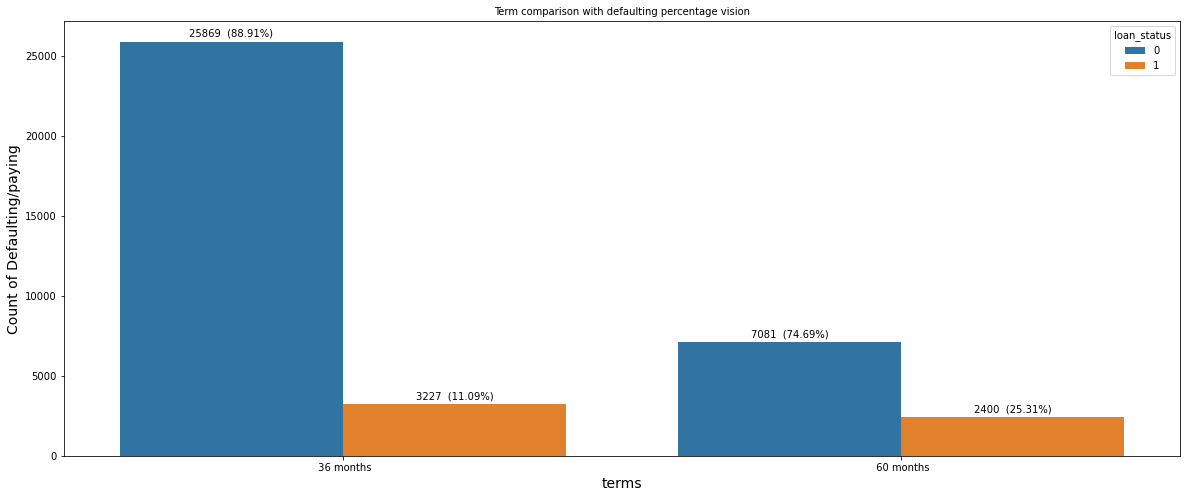

Difference between min and max defaulting percentages = 14.22


'\nwe observe based on above plot, that defaulting rate has increased around 14.22% from 11.09% to 25.31% when the term changed from 3years to 5years.\nGiving loans for lesser tenure sounds better!\n'

In [87]:
## lets plot the number of defaulters and non-defaulters in each type of term
plt_loan_default_nondefault_pct_univariate(data_loan,"term","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="terms",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="Term comparison with defaulting percentage vision",
                                           plot_title_size=10,perc_fontsize=10,n_categories=2,show_count_label=True)
default_map["term"] = round(defaulting_rng_univariate("term"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_rng_univariate("term"),2))


'''
we observe based on above plot, that defaulting rate has increased around 14.22% from 11.09% to 25.31% when the term changed from 3years to 5years.
Giving loans for lesser tenure sounds better!
'''


In [88]:
## let's look at the type of grades in whole df
data_loan.grade.value_counts()
shape = data_loan.shape

#let's check the percentage wise distribution of grades
perc_df=100*(data_loan.grade.value_counts()/shape[0]).to_frame()
perc_df.reset_index(inplace=True)
perc_df

,index,grade
0,B,30.264147
1,A,26.038831
2,C,20.307437
3,D,13.181429
4,E,6.903077
5,F,2.530005
6,G,0.775073


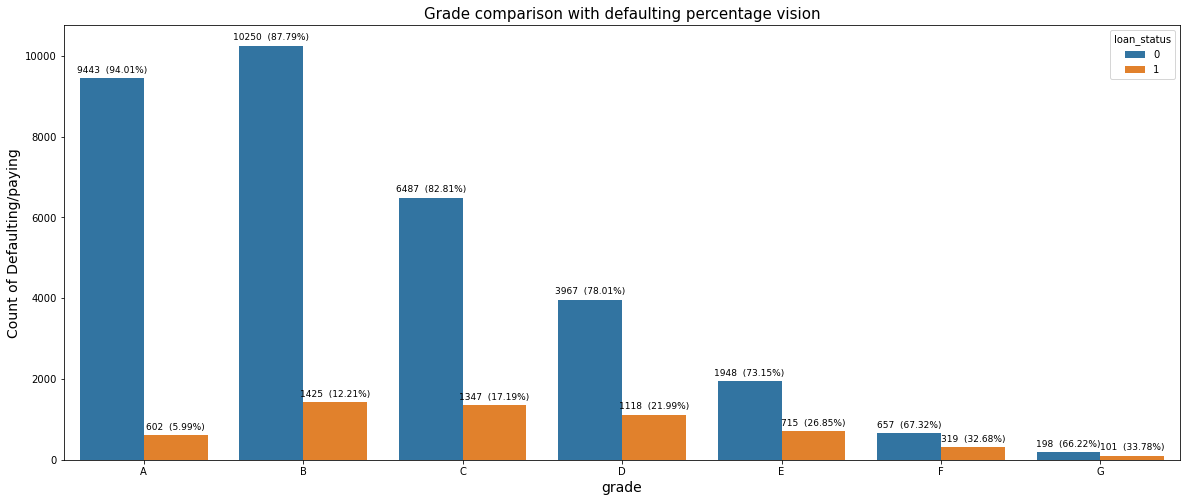

Difference between min and max defaulting percentages = 27.79


In [89]:
## lets plot the number of defaulters and non-defaulters based on grade
plt_loan_default_nondefault_pct_univariate(data_loan.sort_values("grade"),"grade","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="grade",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="Grade comparison with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=9,n_categories=7,show_count_label=True)
default_map["grade"] = round(defaulting_rng_univariate("grade"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_rng_univariate("grade"),2))

In [ ]:
'''
Looking at the Grades
We can see that A type loan has very less defaulting rate of 5.99%
As we go from A to G , the defaulting rate is increasing
'''


In [90]:
#lets look at value distribution of emp_length
data_loan.emp_length.value_counts()

10+ years       8488
< 1 year        4508
2 years         4291
3 years         4012
4 years         3342
5 years         3194
1 year          3169
6 years         2168
7 years         1711
8 years         1435
9 years         1226
NotAvailable    1033
Name: emp_length, dtype: int64

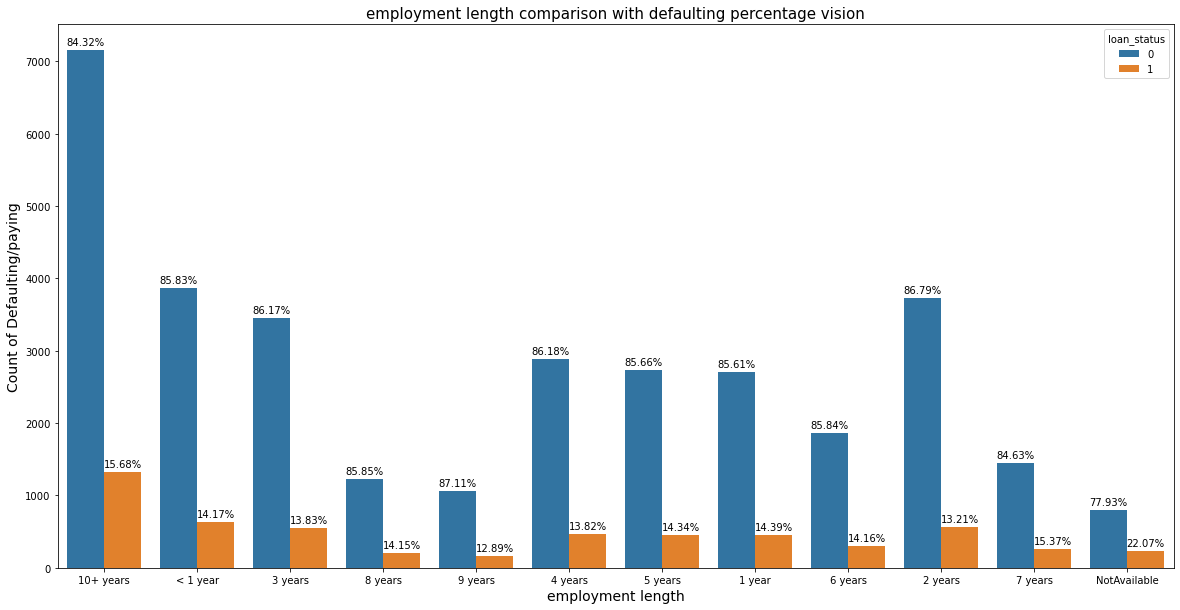

Difference between min and max defaulting percentages = 9.18


In [91]:


## lets plot the number of defaulters and non-defaulters based on employment length
plt_loan_default_nondefault_pct_univariate(data_loan,"emp_length","loan_status",figsize=(20,10),
                                           plottype="countplot",xlabel="employment length",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="employment length comparison with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=10,n_categories=12,show_count_label=False)
#storing variation in the defaulter map
default_map["emp_length"] = round(defaulting_rng_univariate("emp_length"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_rng_univariate("emp_length"),2))

      emp_length  count
0      10+ years   1331
1       < 1 year    639
2        2 years    567
3        3 years    555
4        4 years    462
5        5 years    458
6         1 year    456
7        6 years    307
8        7 years    263
9   NotAvailable    228
10       8 years    203
11       9 years    158


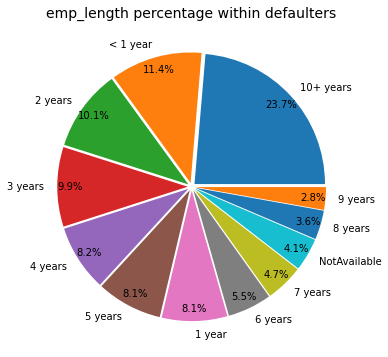

In [92]:
## lets focus on defaulter and non-defaulters separately
def_df = data_loan[data_loan.loan_status == 1]
ndef_df = data_loan[data_loan.loan_status == 0]

## lets check the types of emp_length for defaulters category only
emp_length = def_df.emp_length.value_counts().to_frame()
emp_length.reset_index(inplace=True)
emp_length = emp_length.rename(columns={'index':'emp_length','emp_length':'count'})
print(emp_length)
#lets draw a pie chart to get the percentage proportions for defaulters among emp_length
pie, ax = plt.subplots(figsize=[6,6])
labels = list(emp_length.emp_length)
# print(labels)
plt.pie(x=emp_length['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("emp_length percentage within defaulters", fontsize=14);
pie.savefig("emp_lengthpie.png")

In [93]:
##creating a new dataframe with defaulting percentages in each loan_amnt_bucket within a emp_length

## lets create a new column called int_rate bucket based on the above cutoffs
data_loan.dtypes['int_rate']

data_loan.int_rate = data_loan.int_rate.apply(lambda x : float(x[:-1]))

In [94]:
def int_bucket_func(x):
    if x < 10 :
        return "Low"
    elif x>=10 and x<=15:
        return "Normal"
    else:
        return "High"
data_loan["interest_bucket"] = data_loan.int_rate.apply(lambda x: int_bucket_func(x))


data_loan.interest_bucket.value_counts()

Normal    18514
Low       12067
High       7996
Name: interest_bucket, dtype: int64

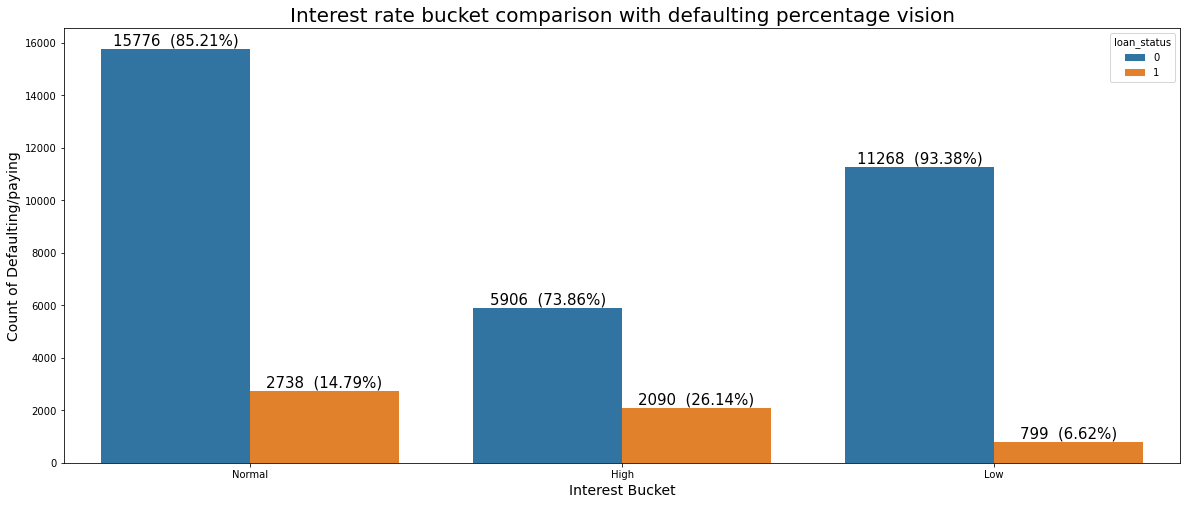

Difference between min and max defaulting percentages = 19.52


In [95]:
## lets plot the number of defaulters and non-defaulters in each type of interest rate
plt_loan_default_nondefault_pct_univariate(data_loan,"interest_bucket","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="Interest Bucket",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="Interest rate bucket comparison with defaulting percentage vision",
                                           plot_title_size=20,perc_fontsize=15,n_categories=3,show_count_label=True)
default_map["interest_bucket"] = round(defaulting_rng_univariate("interest_bucket"),2)
print("Difference between min and max defaulting percentages =",abs(round(defaulting_rng_univariate("interest_bucket"),2)))

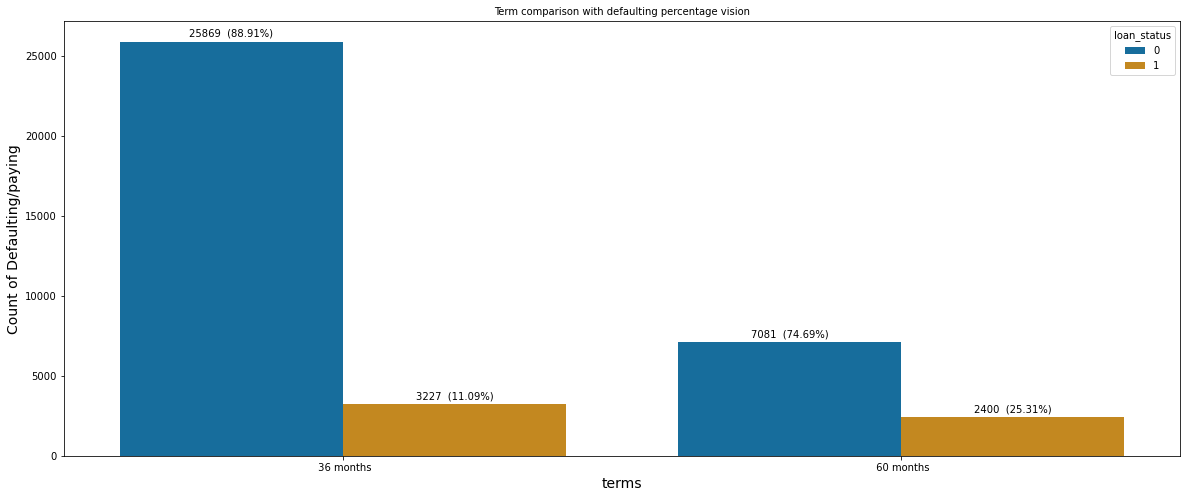

Difference between min and max defaulting percentages = 14.22


In [147]:
'''

Now we can clearly see that defaulting percentage increases a lot from one bucket to the other bucket of interest rate
#we can see that difference between min and max defaulting percentages is 19.52%.
When grouped into three categories, we have observed that the higher the interest rate, more the defaulters.
So its better to give loans in the normal or lower range. 
'''




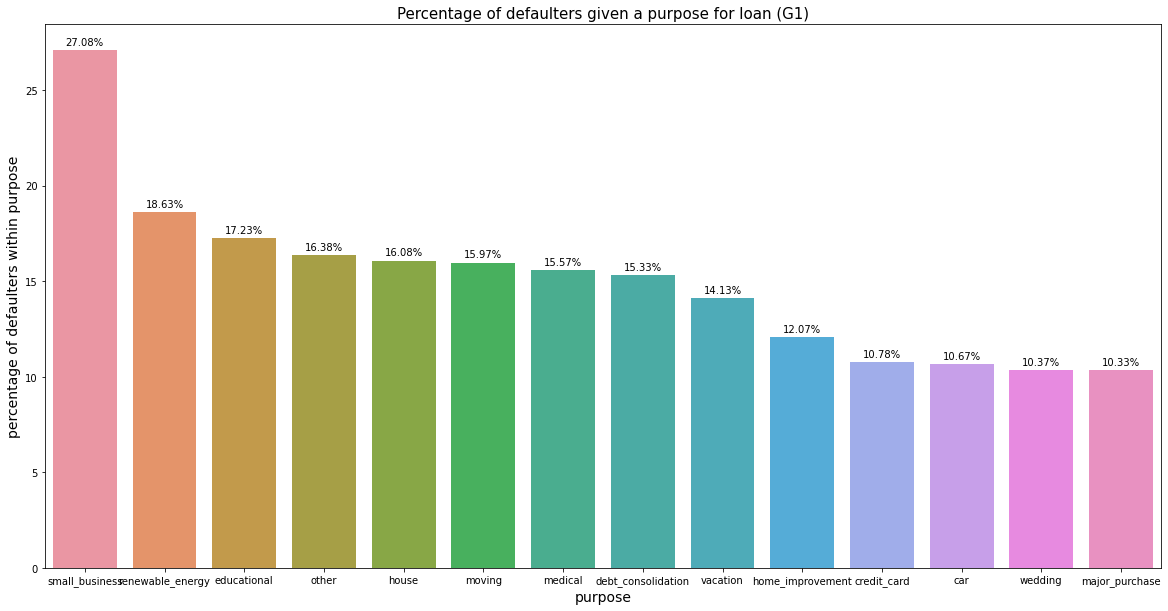

Difference between min and max defaulting percentages = 16.76


In [96]:


## lets plot the number of defaulters and non-defaulters based on purpose
new_df = defaulting_pct_univariate("purpose")
new_df


# ploting the bar chart with count will give us more insight on which purpose is high amongst all
plt_loan_default_nondefault_pct_univariate(new_df.sort_values('def_perc',ascending=False),"purpose","def_perc",figsize=(20,10),
                                           plottype="barplot",xlabel="purpose",xlabel_size=14,
                                           ylabel="percentage of defaulters within purpose",ylabel_size=14,
                                           plot_title="Percentage of defaulters given a purpose for loan (G1)",
                                           plot_title_size=15,perc_fontsize=10,show_count_label=False)

#storing variation in the defaulter map
default_map["purpose"] = round(defaulting_rng_univariate("purpose"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_rng_univariate("purpose"),2))

In [ ]:
'''
Difference between min and max defaulting percentages = 16.76
the above plot shows percentage of defaulters within a given purpose.
we can see that defaulting percentage is higher for small_businesses borrowers i.e. 27.08%
we saw that borrowers taking loans for **small businesses** end up defaulting around 25% of the times.

'''

In [97]:
#  Bivariate Analysis
## Let us define a function which will return a dataframe with defaulting percentages given two categories variable1 and variable 2
def loan_default_pct_bivariate(variable1,variable2):
    x = pd.DataFrame(data_loan.groupby(by=[variable1,variable2])["loan_status"].count()) ## get counts of borrowers in each category in variable 2 under a each category in variable 1
    y = pd.DataFrame(data_loan.groupby(by=[variable1,variable2])["loan_status"].sum())   ## get no of defaulters
    x = x.rename(columns = {"loan_status" : 'count1'})
    y = y.rename(columns = {"loan_status" : 'sum1'})
    z = pd.merge(x,y,left_index=True, right_index=True, how = "inner") ## merge these dataframes
    z["def_perc"] = 100 * z['sum1']/z.count1 ## get the percentages of defaulting
    z["ndef_perc"] = 100 - z.def_perc ## get the percentages of non_ defaulting
    z.reset_index(inplace=True)
    z = z.sort_values("def_perc")
    return z




In [98]:
def plot_loan_default_pct_bivariate(dataframe,variable1=None,variable2=None,figsize=(20,10),
                                           plottype="barplot",xlabel="Xlabel",xlabel_size=18,
                                           ylabel="Ylabel",ylabel_size=18,plot_title="Plot Title",
                                           plot_title_size=20,perc_fontsize=10,show_perc_label= False,
                                          perc_precision=2):
    ''' 
        dataframe      : data 
        variable1      : main category
        variable2      : sub/other category 
        plottype           : barplot -> if looking for barplot under each subcategory within a category
                         meanplot -> if looking for average of all default percentages of subcategories within a category
        figsize        : tuple (x,y) with plot size
        xlabel         : xlabel of the plot
        xlabel_size    : fontsize of xlabel
        ylabel         : ylabel of the plot
        ylabel_size    : fontsize of ylabel
        plot_title     : Title of the graph
        plot_title_size: fontsize of the plot_title
        perc_fontsize  : size of the percentage labels on each bar
        show_perc_label: Bool to show the % suffix on perc label
        perc_precision : no.of decimal points precision for bar label
        
    '''
    
    # Defining the plot size
    plt.figure(figsize=figsize)

    # Defining the values for x-axis, y-axis
    # and from which datafarme the values are to be picked
    if plottype == "barplot":
        plots = sns.barplot(data = dataframe, x = variable1,hue = variable2,y="def_perc")
    elif plottype == "meanplot":
        plots = dataframe.groupby(by=[variable1])["def_perc"].mean().sort_values().plot.bar()

    # Iterrating over the bars one-by-one
    for bar in plots.patches:
        if show_perc_label:
            plots.annotate(str(format(bar.get_height(), '.'+str(perc_precision)+'f'))+"%", 
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()), ha='center', va='center',
                           size=perc_fontsize, xytext=(0, 8),
                           textcoords='offset points')
        else:
            plots.annotate(format(bar.get_height(), '.'+str(perc_precision)+'f'), 
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()), ha='center', va='center',
                           size=perc_fontsize, xytext=(0, 8),
                           textcoords='offset points')
    # Setting the label for x-axis
    plt.xlabel(xlabel, size=xlabel_size)

    # Setting the label for y-axis
    plt.ylabel(ylabel, size=ylabel_size)

    # Setting the title for the graph
    plt.title(plot_title , size = plot_title_size)

    # Fianlly showing the plot
    plt.show()

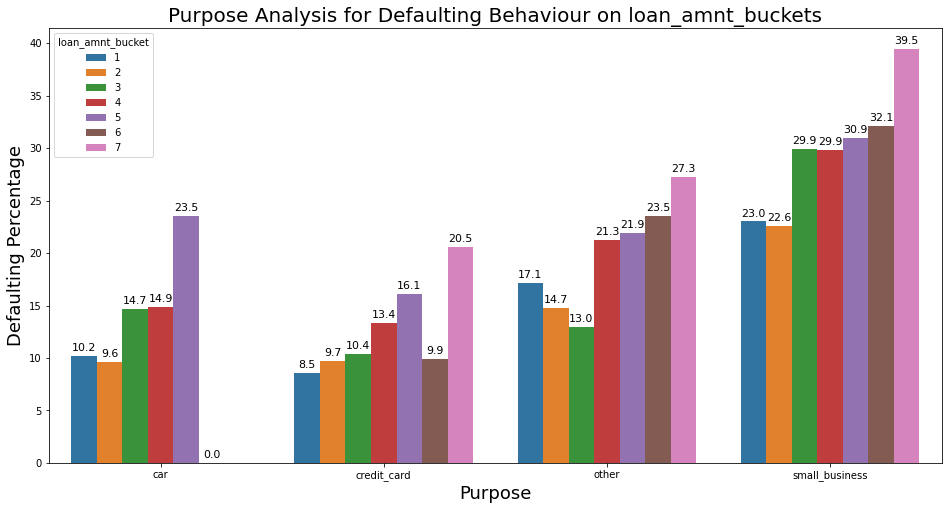

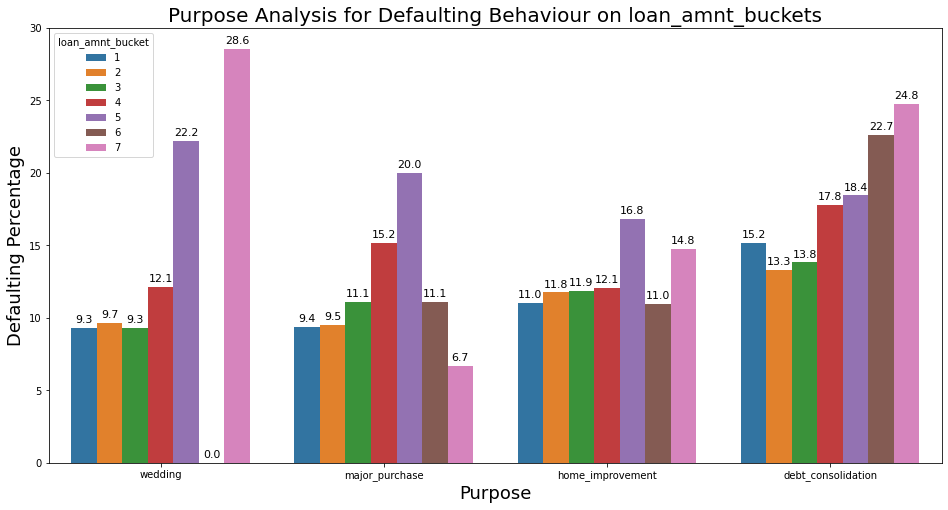

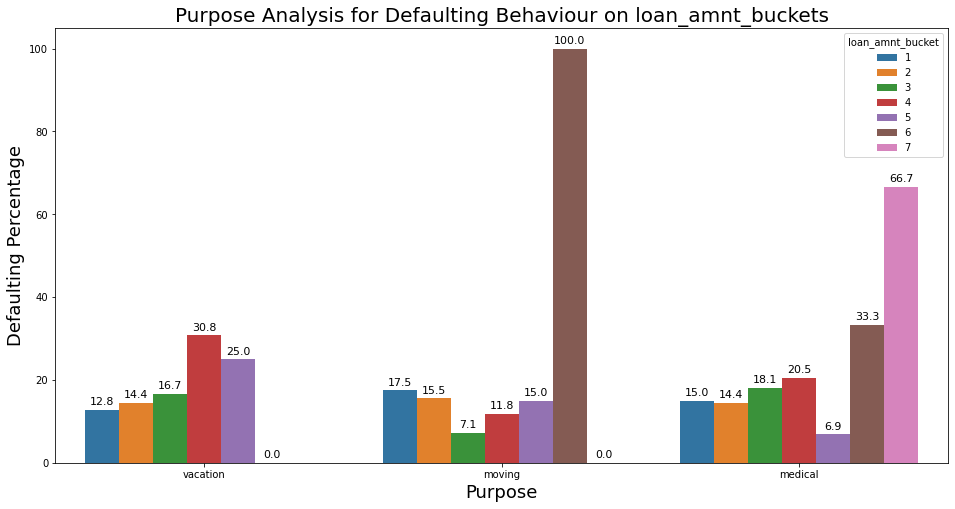

In [99]:
purposes = list(data_loan.purpose.unique())
def_percs = loan_default_pct_bivariate("purpose","loan_amnt_bucket")


plot_loan_default_pct_bivariate(def_percs[def_percs.purpose.isin(purposes[0:4])],"purpose","loan_amnt_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on loan_amnt_buckets",perc_fontsize=11,
                                           perc_precision=1)

plot_loan_default_pct_bivariate(def_percs[def_percs.purpose.isin(purposes[4:8])],"purpose","loan_amnt_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on loan_amnt_buckets",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_pct_bivariate(def_percs[def_percs.purpose.isin(purposes[8:11])],"purpose","loan_amnt_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on loan_amnt_buckets",perc_fontsize=11,
                                           perc_precision=1)


In [ ]:
'''
 Loan-amnt : We see that avg default rate in **major purchase** across all the loan buckets is very less. Small businesses tend to have more avg default rate. So avoiding small_business loans is better.
    - Income-bucket : car loans have less default rates. Small business end up defaulting more across all income bucket
'''